In [40]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import AnovaRM

In [41]:
df=pd.read_csv("all3.csv")

In [42]:
df.describe()

,economic_score,fail_count,fid,boost_distance,final distance,before speed,after speed,STAI,cumulative_economic_score_50,player,total_earning
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,5.141644,0.196000,204.549206,225.927573,93.764830,0.121567,0.124376,41.866667,128.222805,8.000000,257.082200
std,9.098844,0.397233,91.237364,145.093162,97.749685,0.062030,0.059990,10.308115,104.057008,4.323377,112.780647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,21.000000,0.000000,1.000000,151.877300
25%,2.831200,0.000000,155.045975,123.060000,13.837550,0.064200,0.066325,38.000000,52.706875,4.000000,187.860100
50%,4.312250,0.000000,201.871100,188.740000,73.091000,0.136650,0.137200,44.000000,111.035600,8.000000,213.982700
75%,5.832075,0.000000,247.780750,318.400000,145.158875,0.183975,0.184625,49.000000,172.480500,12.000000,325.577500
max,204.918000,1.000000,635.600000,703.440000,651.560000,0.224600,0.224600,57.000000,560.561100,15.000000,560.561100


In [43]:
df

,economic_score,fail_count,fid,boost_distance,final distance,before speed,after speed,threat_type,boost_flag,STAI,cumulative_economic_score_50,player,total_earning
0,0.0000,1,94.8349,99.72,0.0000,0.1750,0.1750,fast,True,44,0.0000,1,151.8773
1,3.7303,0,268.0753,334.08,111.6475,0.1477,0.1477,medium,True,44,3.7303,1,151.8773
2,3.6824,0,271.5600,0.00,287.5200,0.0200,0.0200,slow,False,44,7.4127,1,151.8773
3,4.0430,0,247.3394,390.20,35.2609,0.1824,0.1824,fast,True,44,11.4557,1,151.8773
4,2.8236,0,354.1600,426.28,367.5346,0.0200,0.0680,slow,True,44,14.2793,1,151.8773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,4.7665,0,209.7970,139.76,47.7238,0.1512,0.1512,medium,True,40,183.2586,15,204.5002
746,4.0347,0,247.8509,229.88,99.6903,0.1425,0.1425,medium,True,40,187.2933,15,204.5002
747,4.6395,0,215.5417,149.12,70.5035,0.1406,0.1406,medium,True,40,191.9328,15,204.5002
748,6.4050,0,156.1271,111.96,109.4840,0.0791,0.0791,slow,True,40,198.3378,15,204.5002


In [44]:
df['threat_type']

0        fast
1      medium
2        slow
3        fast
4        slow
        ...  
745    medium
746    medium
747    medium
748      slow
749    medium
Name: threat_type, Length: 750, dtype: object

In [45]:
formula = "fid ~ C(threat_type) + STAI"

# Fit the mixed-effects linear regression model
mixedlm_model = smf.mixedlm(formula, df, groups=df["threat_type"]).fit()

# Step 4: Interpret Results
print(mixedlm_model.summary())

                 Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      fid       
No. Observations:       750          Method:                  REML      
No. Groups:             3            Scale:                   7493.2387 
Min. group size:        228          Log-Likelihood:          -4400.2543
Max. group size:        294          Converged:               Yes       
Mean group size:        250.0                                           
------------------------------------------------------------------------
                          Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
------------------------------------------------------------------------
Intercept                 206.491   87.660  2.356 0.018   34.681 378.300
C(threat_type)[T.medium]  -28.841  122.688 -0.235 0.814 -269.305 211.623
C(threat_type)[T.slow]    -68.498  122.659 -0.558 0.577 -308.904 171.908
STAI                        0.804    0.308  2.615 0.009    0.202   1.

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


### Intercept (206.491):

The intercept represents the estimated mean fid when all other predictors are zero and the threat type is "fast". In this case, it's 206.491. However, since the fid variable might not make sense when all other predictors are zero, this interpretation should be taken with caution.
The confidence interval for the intercept ranges from 34.681 to 378.300, indicating the range in which we are 95% confident that the true population mean fid lies.
C(threat_type)[T.medium] (-28.841):

This coefficient represents the difference in the estimated mean fid between the "medium" threat type and the reference category, which is "fast". In this case, it's -28.841.
However, the p-value associated with this coefficient is 0.814, which is greater than the typical significance level of 0.05. This suggests that there is no statistically significant difference in fid between the "medium" threat type and the "fast" threat type.
C(threat_type)[T.slow] (-68.498):

Similarly, this coefficient represents the difference in the estimated mean fid between the "slow" threat type and the reference category, which is "fast". In this case, it's -68.498.
The p-value associated with this coefficient is 0.577, which is also greater than 0.05. This indicates that there is no statistically significant difference in fid between the "slow" threat type and the "fast" threat type.
STAI (0.804):

The coefficient for the STAI variable indicates that for each one-unit increase in the STAI score, the fid is expected to increase by 0.804 units, holding all other variables constant.
The p-value associated with this coefficient is 0.009, which is less than 0.05, suggesting that the effect of STAI on fid is statistically significant.
## Overall, the model suggests that the STAI score has a statistically significant effect on fid, but there is no significant difference in fid between different threat types (fast, medium, slow) after accounting for the STAI score.

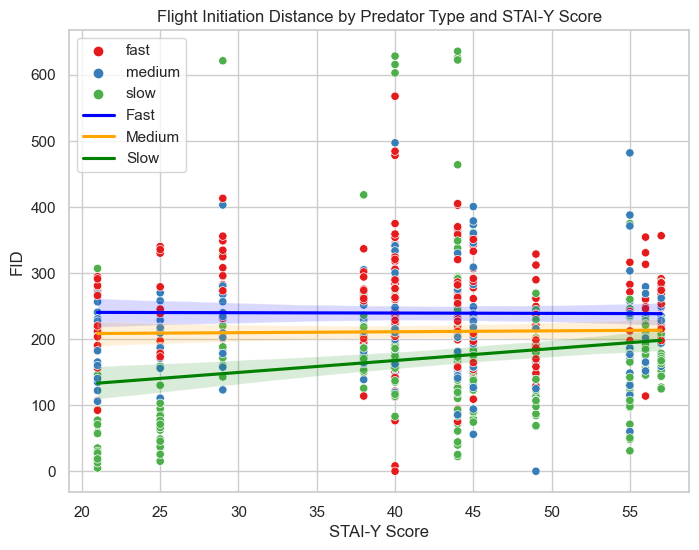

In [46]:
sns.set(style="whitegrid")

# Create a scatter plot with separate regression lines for each predator type
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='STAI', y='fid', hue='threat_type', palette='Set1')

# Fit separate linear regression lines for each predator type
sns.regplot(data=df[df['threat_type']=='fast'], x='STAI', y='fid', scatter=False, color='blue', label='Fast')
sns.regplot(data=df[df['threat_type']=='medium'], x='STAI', y='fid', scatter=False, color='orange', label='Medium')
sns.regplot(data=df[df['threat_type']=='slow'], x='STAI', y='fid', scatter=False, color='green', label='Slow')

# Add legend and labels
plt.legend()
plt.xlabel('STAI-Y Score')
plt.ylabel('FID')
plt.title('Flight Initiation Distance by Predator Type and STAI-Y Score')

# Show plot
plt.show()

In [47]:
formula = "fid ~ 0 + C(threat_type) + STAI"  # 0 removes intercept

# Fit the mixed-effects linear regression model
mixedlm_model = smf.mixedlm(formula, df, groups=df["threat_type"]).fit()

# Step 4: Interpret Results
print(mixedlm_model.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     fid       
No. Observations:     750         Method:                 REML      
No. Groups:           3           Scale:                  7493.2387 
Min. group size:      228         Log-Likelihood:         -4400.2543
Max. group size:      294         Converged:              Yes       
Mean group size:      250.0                                         
--------------------------------------------------------------------
                        Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
--------------------------------------------------------------------
C(threat_type)[fast]    206.491   87.660 2.356 0.018  34.681 378.300
C(threat_type)[medium]  177.650   87.705 2.026 0.043   5.750 349.549
C(threat_type)[slow]    137.993   87.695 1.574 0.116 -33.886 309.871
STAI                      0.804    0.308 2.615 0.009   0.202   1.407
Group Var              7493.239                   

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [48]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'economic_score', 'threat_type', and 'STAI' are columns in your DataFrame
# Assuming 'subject_id' is a column identifying each subject

# Convert predator type (threat_type) to categorical variable
df['threat_type'] = pd.Categorical(df['threat_type'])

# Perform two-way repeated-measures ANOVA
model = ols('economic_score ~ C(threat_type) * STAI', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)

# Print ANOVA table
print(anova_table)


                           sum_sq     df          F        PR(>F)
Intercept               83.992338    1.0   1.181434  2.774162e-01
C(threat_type)        3330.001281    2.0  23.419864  1.368416e-10
STAI                     7.916506    1.0   0.111353  7.387026e-01
C(threat_type):STAI   1655.466614    2.0  11.642879  1.049728e-05
Residual             52893.581206  744.0        NaN           NaN
